# 9. Support Vector Machines – Applied

Applied excercises from **Chapter 9** of [An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/) by Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani.

In [91]:
import itertools

import numpy as np
import pandas as pd
import patsy as pt
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn import preprocessing
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression

### 4. Generate a simulated two-class data set with 100 observations and two features in which there is a visible but non-linear separation between the two classes. 

In [67]:
# Generate noisy moon shaped data
n_samples = 100
noise     = .3
X_train, y_train = make_moons(n_samples=n_samples, noise=noise, random_state=0)
X_test, y_test = make_moons(n_samples=n_samples, noise=noise, random_state=1)

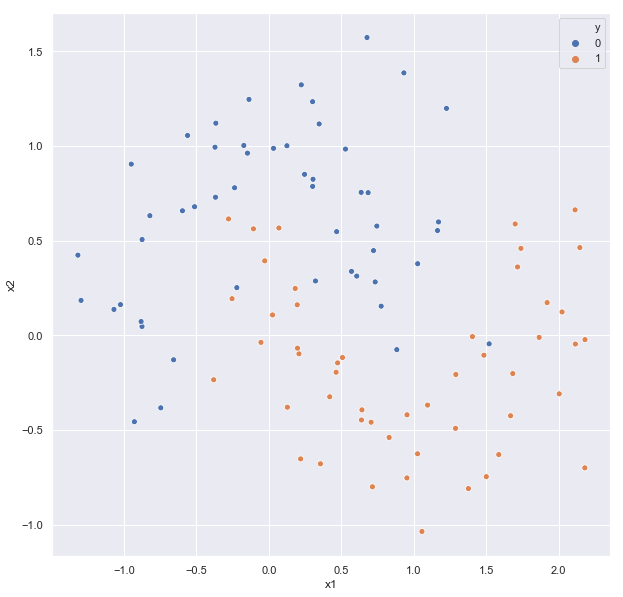

In [68]:
# Plot data
df = pd.concat([pd.DataFrame(data=X_train, columns=['x1', 'x2']), pd.Series(y_train, name='y')], axis=1)
plt.figure(figsize=(10, 10))
sns.scatterplot(x='x1', y='x2', hue='y', data=df);

### ... Show that in this setting, a support vector machine with a polynomial kernel (with degree greater than 1) or a radial kernel will outperform a support vector classifier on the training data. 

### Which technique performs best on the test data? Make plots and report training and test error rates in order to back up your assertions.

In [69]:
def plot_clf(model, df, grid_range, show_contours=False, show_support_vectors=False):
    # Decision boundary plot
    
    # Get grid of values in given range
    x1 = grid_range
    x2 = grid_range
    xx1, xx2 = np.meshgrid(x1, x2, sparse=False)
    Xgrid = np.stack((xx1.flatten(), xx2.flatten())).T
    
    # Get decision boundary values for plot grid
    decision_boundary      = model.predict(Xgrid)
    decision_boundary_grid = decision_boundary.reshape(len(x2), len(x1))
    
    # Get decision function values for plot grid
    decision_function      = model.decision_function(Xgrid)
    decision_function_grid = decision_function.reshape(len(x2), len(x1))
    
    fig = plt.figure(figsize=(10, 10))
    if show_contours:
        plt.contourf(x1, x2, decision_function_grid);
    plt.contour(x1, x2, decision_boundary_grid);
    
    sns.scatterplot(x='x1', y='x2', hue='y', data=df)
    if show_support_vectors:
        sns.scatterplot(x=model.support_vectors_[:,0], y=model.support_vectors_[:,1], color='red', marker='+', s=500)
    plt.show();

#### Linear kernel

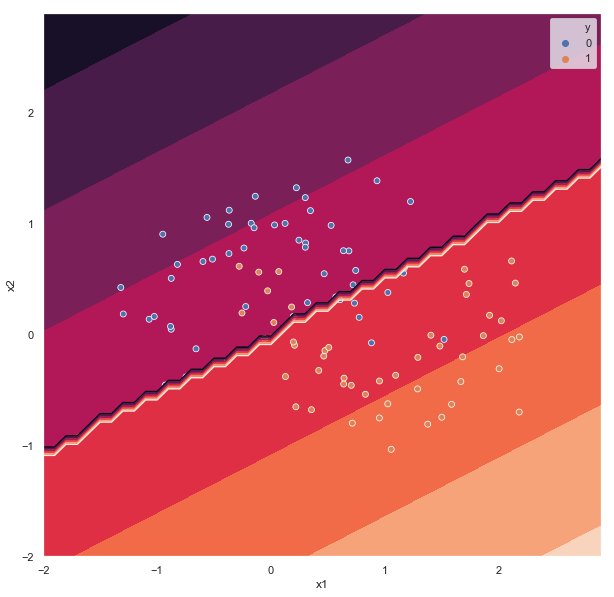

Training accuracy: 0.84
Test accuracy    : 0.83


In [70]:
model = svm.SVC(kernel='linear', gamma=1, C=1, random_state=0, probability=True).fit(X_train, y_train)

plot_clf(model, df, np.arange(-2, 3, .1), show_contours=True)

print(f'Training accuracy: {model.score(X_train, y_train)}')
print(f'Test accuracy    : {model.score(X_test, y_test)}')

#### Polynomial kernel

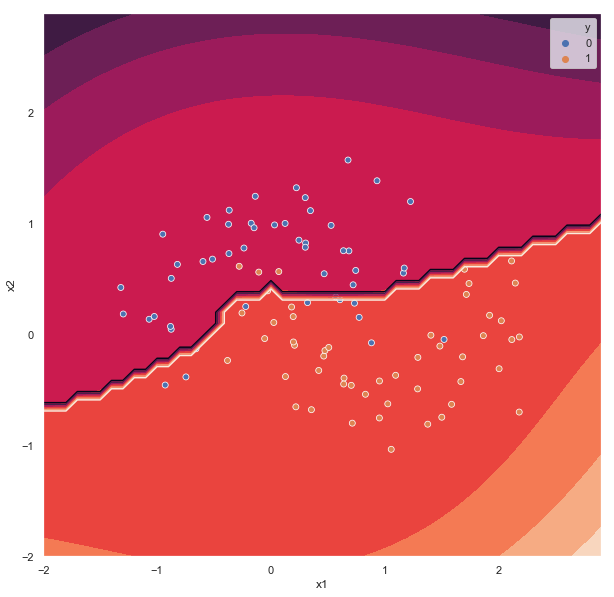

Training accuracy: 0.86
Test accuracy    : 0.88


In [71]:
model = svm.SVC(kernel='poly', gamma=1, C=1, random_state=0, probability=True).fit(X_train, y_train)

plot_clf(model, df, np.arange(-2, 3, .1), show_contours=True)

print(f'Training accuracy: {model.score(X_train, y_train)}')
print(f'Test accuracy    : {model.score(X_test, y_test)}')

#### Radial kernel

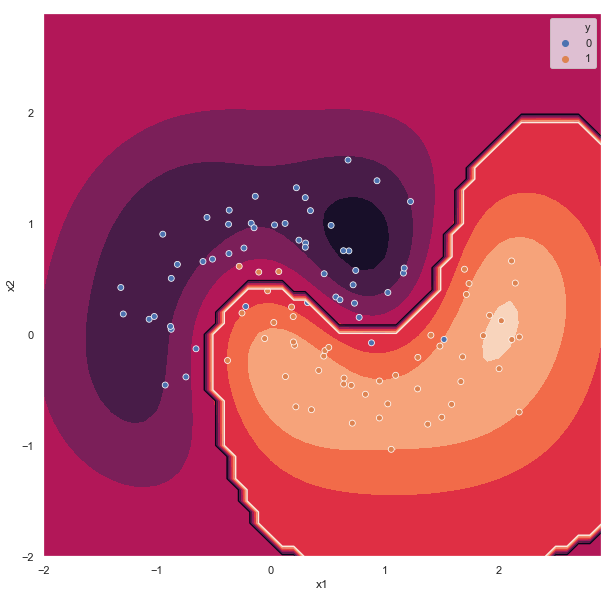

Training accuracy: 0.93
Test accuracy    : 0.93


In [72]:
model = svm.SVC(kernel='rbf', gamma=1, C=1, random_state=0, probability=True).fit(X_train, y_train)

plot_clf(model, df, np.arange(-2, 3, .1), show_contours=True)

print(f'Training accuracy: {model.score(X_train, y_train)}')
print(f'Test accuracy    : {model.score(X_test, y_test)}')

**Comment** In this setting an SVM with a radial kernel outperforms both linear and polynomial kernel models. The linear kernel model is the least effective because the data is not linearly separable.

### 5. We have seen that we can fit an SVM with a non-linear kernel in order to perform classification using a non-linear decision boundary. We will now see that we can also obtain a non-linear decision boundary by performing logistic regression using non-linear transformations of the features.

(a) Generate a data set with n = 500 and p = 2, such that the observations belong to two classes with a quadratic decision boundary between them. For instance, you can do this as follows:

In [163]:
np.random.seed(0)
x1 = np.random.uniform(0, 1, 500) - 0.5
x2 = np.random.uniform(0, 1, 500) - 0.5
y = 1*(x1**2 - x2**2 > 0)

(b) Plot the observations, colored according to their class labels. Your plot should display X1 on the x-axis, and X2 on the y- axis.

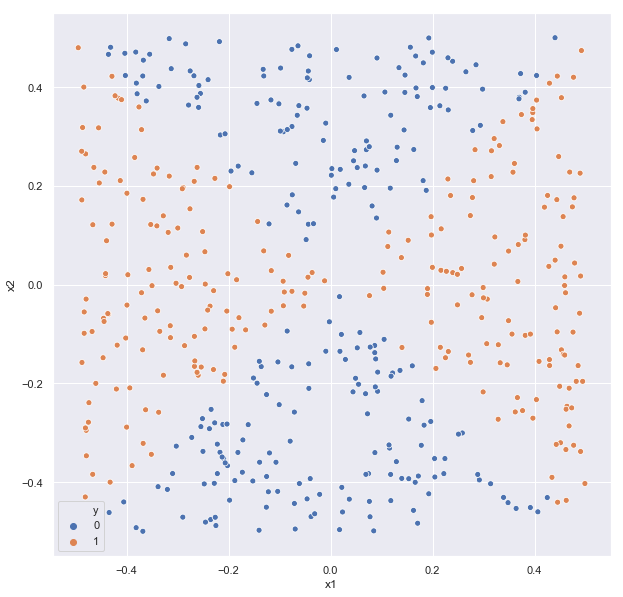

In [164]:
# Plot data
df = pd.DataFrame({'x1':x1, 'x2':x2, 'y':y})
plt.figure(figsize=(10, 10))
sns.scatterplot(x='x1', y='x2', hue='y', data=df);

(c) Fit a logistic regression model to the data, using X1 and X2 as predictors.

(d) Apply this model to the training data in order to obtain a predicted class label for each training observation. Plot the observations, colored according to the predicted class labels. The decision boundary should be linear.

In [165]:
# Pre-process data with only linear features
f = 'y ~ x1 + x2'
y, X = pt.dmatrices(f, df)
y = np.ravel(y)

train = np.random.random(len(y)) > 0.5

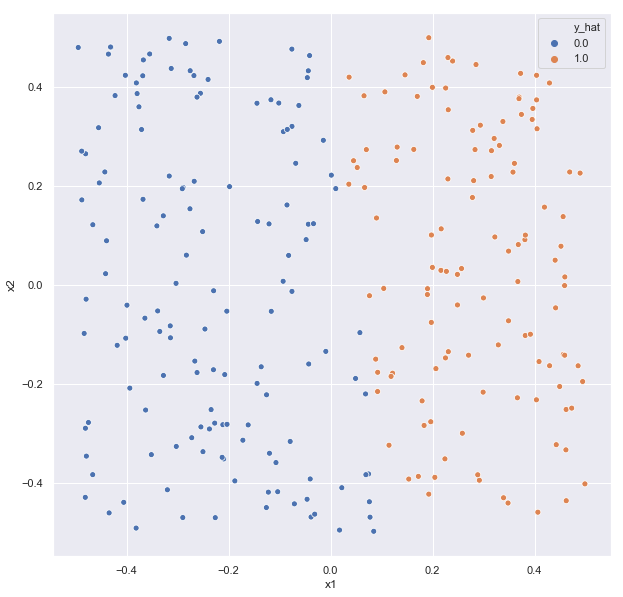

Training accuracy: 0.5984555984555985
Test accuracy    : 0.5228215767634855


In [166]:
# Fit model on training set
model = LogisticRegression().fit(X[train], y[train])
# Predict
y_hat = model.predict(X[train])

# Plot data
plot_df = pd.DataFrame({'x1':X[train][:,1], 'x2':X[train][:,2], 'y_hat':y_hat})
plt.figure(figsize=(10, 10))
sns.scatterplot(x='x1', y='x2', hue='y_hat', data=plot_df)
plt.show();

print(f'Training accuracy: {model.score(X[train], y[train])}')
print(f'Test accuracy    : {model.score(X[~train], y[~train])}')

(e) Now fit a logistic regression model to the data using non-linear functions of X1 and X2 as predictors (e.g. X12, X1 ×X2, log(X2), and so forth).

(f) Apply this model to the training data in order to obtain a pre- dicted class label for each training observation. Plot the ob- servations, colored according to the predicted class labels. The decision boundary should be obviously non-linear. If it is not, then repeat (a)-(e) until you come up with an example in which the predicted class labels are obviously non-linear.

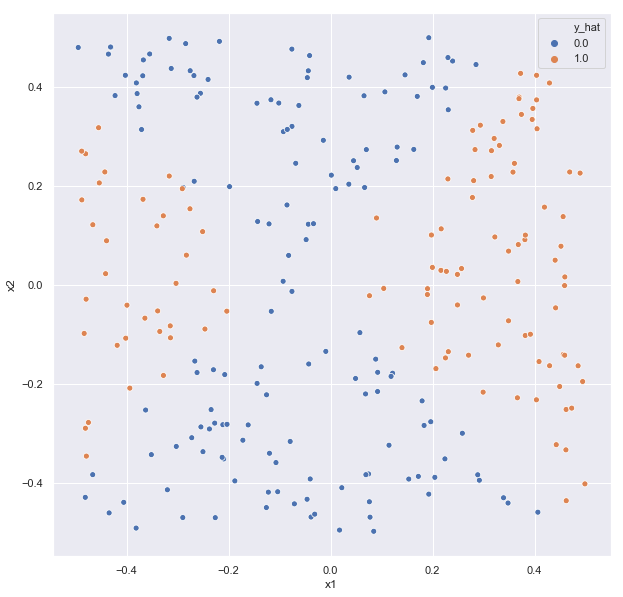

Training accuracy: 0.8957528957528957
Test accuracy    : 0.8506224066390041


In [173]:
# Pre-process data with quadratic features
f = 'y ~ x1 + x2 + np.power(x1, 2) + np.power(x2, 2)'
y, X = pt.dmatrices(f, df)
y = np.ravel(y)

# Fit model on training set
model = LogisticRegression().fit(X[train], y[train])
# Predict
y_hat = model.predict(X[train])

# Plot data
plot_df = pd.DataFrame({'x1':X[train][:,1], 'x2':X[train][:,2], 'y_hat':y_hat})
plt.figure(figsize=(10, 10))
sns.scatterplot(x='x1', y='x2', hue='y_hat', data=plot_df)
plt.show();

print(f'Training accuracy: {model.score(X[train], y[train])}')
print(f'Test accuracy    : {model.score(X[~train], y[~train])}')

(g) Fit a support vector classifier to the data with X1 and X2 as predictors. Obtain a class prediction for each training observation. Plot the observations, colored according to the predicted class labels.

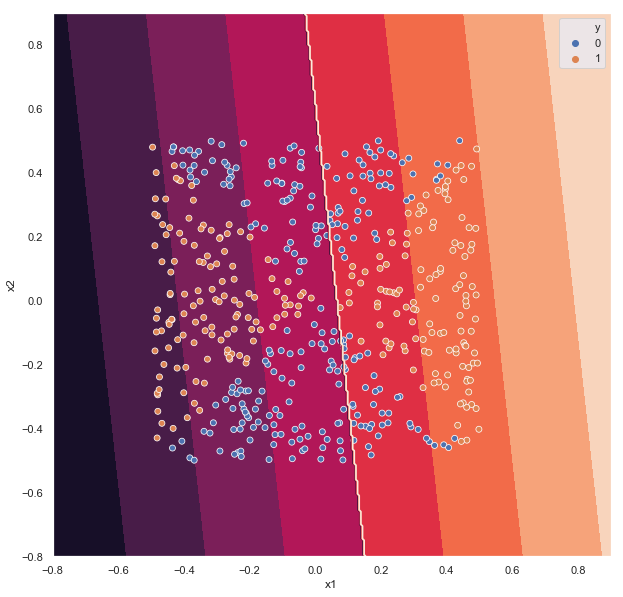

Training accuracy: 0.6023166023166023
Test accuracy    : 0.5186721991701245


In [188]:
f = 'y ~ x1 + x2 - 1'
y, X = pt.dmatrices(f, df)
y = np.ravel(y)

model = svm.SVC(kernel='linear', gamma=1, C=1, random_state=0, probability=True).fit(X[train], y[train])

plot_clf(model, df, np.arange(-.8, .9, .005), show_contours=True)

print(f'Training accuracy: {model.score(X[train], y[train])}')
print(f'Test accuracy    : {model.score(X[~train], y[~train])}')

(h) Fit a SVM using a non-linear kernel to the data. Obtain a class prediction for each training observation. Plot the observations, colored according to the predicted class labels.

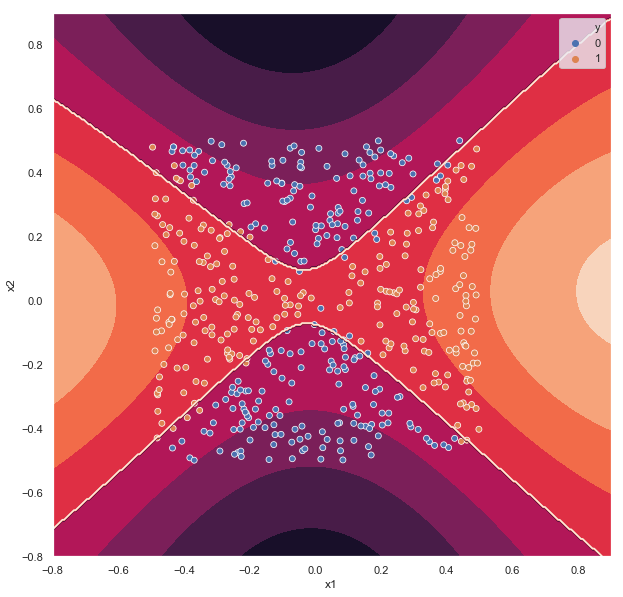

Training accuracy: 0.9420849420849421
Test accuracy    : 0.9336099585062241


In [189]:
f = 'y ~ x1 + x2 - 1'
y, X = pt.dmatrices(f, df)
y = np.ravel(y)

model = svm.SVC(kernel='rbf', gamma=1, C=1, random_state=0, probability=True).fit(X[train], y[train])

plot_clf(model, df, np.arange(-.8, .9, .005), show_contours=True)

print(f'Training accuracy: {model.score(X[train], y[train])}')
print(f'Test accuracy    : {model.score(X[~train], y[~train])}')